# Exploring and Processing the Data

In [1]:
# imports
import pandas as pd
import numpy as np
import os

## Import the data

In [6]:
#file paths for storing the data
raw_data_path = os.path.join(os.path.pardir,'data','raw')
train_file_path = os.path.join(raw_data_path,'train.csv')
test_file_path = os.path.join(raw_data_path,'test.csv')

In [7]:
# read the data with all the defaults for pandas
train_df = pd.read_csv(train_file_path, index_col='PassengerId')
test_df = pd.read_csv(test_file_path, index_col='PassengerId')


In [8]:
# What is the type of object?
type(train_df)

pandas.core.frame.DataFrame

### Basic structure of the data


In [10]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [11]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
Pclass      418 non-null int64
Name        418 non-null object
Sex         418 non-null object
Age         332 non-null float64
SibSp       418 non-null int64
Parch       418 non-null int64
Ticket      418 non-null object
Fare        417 non-null float64
Cabin       91 non-null object
Embarked    418 non-null object
dtypes: float64(2), int64(3), object(5)
memory usage: 35.9+ KB


In [12]:
# great, our data structures are in the data frames
#
# Survived = TRUE/FALSE 0/1
# PClass is passenger class, 1,2,3
# SibSp - siblings or spouse onboard
# Parch - number of parents or children
# Ticket - ticket number
# Fare - fare
# Cabin - which cabin were they in
# Embarked - point of embarkation (C Cherbourg, Q Queenstown - now Cobh, S Southampton)
#
# We should also note that we have non-null entries
# in Training, we don't have ages for some of the passengers
# and we only have some Cabin informaiton
# and we're missing info on where some of the passengers embarked
# Memory Usage is helpful if we're working on a whole bunch of data
#
# In Test we have 418 entries, with missing values too.  We'll fix this up
# We do not have the Survived column in TEST dataset - that's the prediction we are trying to achieve
#
# Let's add a Survived column to Test, then combine both the datasets


In [13]:
test_df['Survived'] = -888 # Add Survived with the default value of -888

In [14]:
df = pd.concat((train_df, test_df), axis=0) #there are some axis parameters - how do we want to concat them?
# if axis = 0, then concat row wise - i.e. stack on each other.
# if axis = 1, then concat along the columns sideways 

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  """Entry point for launching an IPython kernel.


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 11 columns):
Age         1046 non-null float64
Cabin       295 non-null object
Embarked    1307 non-null object
Fare        1308 non-null float64
Name        1309 non-null object
Parch       1309 non-null int64
Pclass      1309 non-null int64
Sex         1309 non-null object
SibSp       1309 non-null int64
Survived    1309 non-null int64
Ticket      1309 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 122.7+ KB


In [16]:
# Now we have all the rows
df.head()

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
PassengerId,,,,,,,,,,,
1,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,3,male,1,0,A/5 21171
2,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,female,1,1,PC 17599
3,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,female,0,1,STON/O2. 3101282
4,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,female,1,1,113803
5,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,3,male,0,0,373450


In [17]:
df.head(10)

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
PassengerId,,,,,,,,,,,
1,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,3,male,1,0,A/5 21171
2,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,female,1,1,PC 17599
3,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,female,0,1,STON/O2. 3101282
4,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,female,1,1,113803
5,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,3,male,0,0,373450
6,NaN,NaN,Q,8.4583,"Moran, Mr. James",0,3,male,0,0,330877
7,54.0,E46,S,51.8625,"McCarthy, Mr. Timothy J",0,1,male,0,0,17463
8,2.0,NaN,S,21.0750,"Palsson, Master. Gosta Leonard",1,3,male,3,0,349909
9,27.0,NaN,S,11.1333,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",2,3,female,0,1,347742


In [18]:
df.tail()

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
PassengerId,,,,,,,,,,,
1305,NaN,NaN,S,8.0500,"Spector, Mr. Woolf",0,3,male,0,-888,A.5. 3236
1306,39.0,C105,C,108.9000,"Oliva y Ocana, Dona. Fermina",0,1,female,0,-888,PC 17758
1307,38.5,NaN,S,7.2500,"Saether, Mr. Simon Sivertsen",0,3,male,0,-888,SOTON/O.Q. 3101262
1308,NaN,NaN,S,8.0500,"Ware, Mr. Frederick",0,3,male,0,-888,359309
1309,NaN,NaN,C,22.3583,"Peter, Master. Michael J",1,3,male,1,-888,2668


In [20]:
df.Name

PassengerId
1                                 Braund, Mr. Owen Harris
2       Cumings, Mrs. John Bradley (Florence Briggs Th...
3                                  Heikkinen, Miss. Laina
4            Futrelle, Mrs. Jacques Heath (Lily May Peel)
5                                Allen, Mr. William Henry
6                                        Moran, Mr. James
7                                 McCarthy, Mr. Timothy J
8                          Palsson, Master. Gosta Leonard
9       Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
10                    Nasser, Mrs. Nicholas (Adele Achem)
11                        Sandstrom, Miss. Marguerite Rut
12                               Bonnell, Miss. Elizabeth
13                         Saundercock, Mr. William Henry
14                            Andersson, Mr. Anders Johan
15                   Vestrom, Miss. Hulda Amanda Adolfina
16                       Hewlett, Mrs. (Mary D Kingcome) 
17                                   Rice, Master. Eugene
18

### Common Pandas commands

In [21]:
# Selection of a particular column
df.Name

PassengerId
1                                 Braund, Mr. Owen Harris
2       Cumings, Mrs. John Bradley (Florence Briggs Th...
3                                  Heikkinen, Miss. Laina
4            Futrelle, Mrs. Jacques Heath (Lily May Peel)
5                                Allen, Mr. William Henry
6                                        Moran, Mr. James
7                                 McCarthy, Mr. Timothy J
8                          Palsson, Master. Gosta Leonard
9       Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
10                    Nasser, Mrs. Nicholas (Adele Achem)
11                        Sandstrom, Miss. Marguerite Rut
12                               Bonnell, Miss. Elizabeth
13                         Saundercock, Mr. William Henry
14                            Andersson, Mr. Anders Johan
15                   Vestrom, Miss. Hulda Amanda Adolfina
16                       Hewlett, Mrs. (Mary D Kingcome) 
17                                   Rice, Master. Eugene
18

In [22]:
# or column name as a string is possible
df['Name']

PassengerId
1                                 Braund, Mr. Owen Harris
2       Cumings, Mrs. John Bradley (Florence Briggs Th...
3                                  Heikkinen, Miss. Laina
4            Futrelle, Mrs. Jacques Heath (Lily May Peel)
5                                Allen, Mr. William Henry
6                                        Moran, Mr. James
7                                 McCarthy, Mr. Timothy J
8                          Palsson, Master. Gosta Leonard
9       Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
10                    Nasser, Mrs. Nicholas (Adele Achem)
11                        Sandstrom, Miss. Marguerite Rut
12                               Bonnell, Miss. Elizabeth
13                         Saundercock, Mr. William Henry
14                            Andersson, Mr. Anders Johan
15                   Vestrom, Miss. Hulda Amanda Adolfina
16                       Hewlett, Mrs. (Mary D Kingcome) 
17                                   Rice, Master. Eugene
18

In [23]:
# select multiple columns using a list of column name strings
df[['Name','Age']]

,Name,Age
PassengerId,,
1,"Braund, Mr. Owen Harris",22.0
2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0
3,"Heikkinen, Miss. Laina",26.0
4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0
5,"Allen, Mr. William Henry",35.0
6,"Moran, Mr. James",NaN
7,"McCarthy, Mr. Timothy J",54.0
8,"Palsson, Master. Gosta Leonard",2.0
9,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",27.0


In [25]:
# indexing for loc for label based indexing - i.e. we are using the PassengerId
# Get all columns - we want to get only columns with rows id from 1-10
# 
df.loc[5:10,]

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
PassengerId,,,,,,,,,,,
5,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,3,male,0,0,373450
6,NaN,NaN,Q,8.4583,"Moran, Mr. James",0,3,male,0,0,330877
7,54.0,E46,S,51.8625,"McCarthy, Mr. Timothy J",0,1,male,0,0,17463
8,2.0,NaN,S,21.0750,"Palsson, Master. Gosta Leonard",1,3,male,3,0,349909
9,27.0,NaN,S,11.1333,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",2,3,female,0,1,347742
10,14.0,NaN,C,30.0708,"Nasser, Mrs. Nicholas (Adele Achem)",0,2,female,1,1,237736


In [28]:
# indexing and only return certain columns - all columns from Age->PClass, for pax 5->10
df.loc[5:10,'Age':'Pclass']

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass
PassengerId,,,,,,,
5,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,3
6,NaN,NaN,Q,8.4583,"Moran, Mr. James",0,3
7,54.0,E46,S,51.8625,"McCarthy, Mr. Timothy J",0,1
8,2.0,NaN,S,21.0750,"Palsson, Master. Gosta Leonard",1,3
9,27.0,NaN,S,11.1333,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",2,3
10,14.0,NaN,C,30.0708,"Nasser, Mrs. Nicholas (Adele Achem)",0,2


In [30]:
# select discrete columns
df.loc[5:10, ['Survived','Fare','Embarked','Pclass']]

,Survived,Fare,Embarked,Pclass
PassengerId,,,,
5,0,8.0500,S,3
6,0,8.4583,Q,3
7,0,51.8625,S,1
8,0,21.0750,S,3
9,1,11.1333,S,3
10,1,30.0708,C,2


In [31]:
# position based indexing is also possible - not recommended, incase we add extra columns...
df.iloc[5:10, 3:8]

,Fare,Name,Parch,Pclass,Sex
PassengerId,,,,,
6,8.4583,"Moran, Mr. James",0,3,male
7,51.8625,"McCarthy, Mr. Timothy J",0,1,male
8,21.0750,"Palsson, Master. Gosta Leonard",1,3,male
9,11.1333,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",2,3,female
10,30.0708,"Nasser, Mrs. Nicholas (Adele Achem)",0,2,female


In [32]:
# filtering rows on conditions
male_passengers = df.loc[df.Sex == 'male',:]
print('Number of male passengers: {0}'.format(len(male_passengers)))

Number of male passengers: 843


In [33]:
# use & and | operators to build complex logic
male_passengers_first_class = df.loc[((df.Sex =='male') & (df.Pclass == 1))]
print('number of male 1st class pax: {0}'.format(len(male_passengers_first_class)))

number of male 1st class pax: 179


## Summary Statistics

In [34]:
# describe to get stats for all the numberic columsn - survived is skewed by our -888 default value earlier added
df.describe()

,Age,Fare,Parch,Pclass,SibSp,Survived
count,1046.000000,1308.000000,1309.000000,1309.000000,1309.000000,1309.000000
mean,29.881138,33.295479,0.385027,2.294882,0.498854,-283.301757
std,14.413493,51.758668,0.865560,0.837836,1.041658,414.337413
min,0.170000,0.000000,0.000000,1.000000,0.000000,-888.000000
25%,21.000000,7.895800,0.000000,2.000000,0.000000,-888.000000
50%,28.000000,14.454200,0.000000,3.000000,0.000000,0.000000
75%,39.000000,31.275000,0.000000,3.000000,1.000000,1.000000
max,80.000000,512.329200,9.000000,3.000000,8.000000,1.000000


In [35]:
# Let's get some stats manually
# Using numerical features to start with
print('Mean fare: {0}'.format(df.Fare.mean()))
print('Median fare: {0}'.format(df.Fare.median()))

Mean fare: 33.2954792813456
Median fare: 14.4542


In [36]:
# let's look at a bunch of other data
print('Min fare : {0}'.format(df.Fare.min())) # minimum
print('Max fare : {0}'.format(df.Fare.max())) # maximum
print('Fare range : {0}'.format(df.Fare.max()  - df.Fare.min())) # range
print('25 percentile : {0}'.format(df.Fare.quantile(.25))) # 25 percentile
print('50 percentile : {0}'.format(df.Fare.quantile(.5))) # 50 percentile
print('75 percentile : {0}'.format(df.Fare.quantile(.75))) # 75 percentile
print('Variance fare : {0}'.format(df.Fare.var())) # variance
print('Standard deviation fare : {0}'.format(df.Fare.std())) # standard deviation

Min fare : 0.0
Max fare : 512.3292
Fare range : 512.3292
25 percentile : 7.8958
50 percentile : 14.4542
75 percentile : 31.275
Variance fare : 2678.959737892894
Standard deviation fare : 51.75866823917414


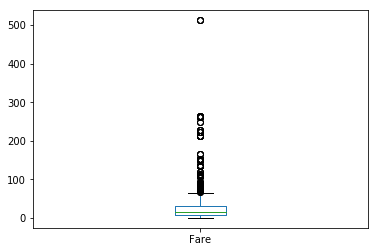

In [39]:
%matplotlib inline


# box whisker!!
df.Fare.plot(kind='box')

### categorical features

In [40]:
df.describe(include='all')# describe categorical features too

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
count,1046.000000,295,1307,1308.000000,1309,1309.000000,1309.000000,1309,1309.000000,1309.000000,1309
unique,NaN,186,3,NaN,1307,NaN,NaN,2,NaN,NaN,929
top,NaN,C23 C25 C27,S,NaN,"Connolly, Miss. Kate",NaN,NaN,male,NaN,NaN,CA. 2343
freq,NaN,6,914,NaN,2,NaN,NaN,843,NaN,NaN,11
mean,29.881138,NaN,NaN,33.295479,NaN,0.385027,2.294882,NaN,0.498854,-283.301757,NaN
std,14.413493,NaN,NaN,51.758668,NaN,0.865560,0.837836,NaN,1.041658,414.337413,NaN
min,0.170000,NaN,NaN,0.000000,NaN,0.000000,1.000000,NaN,0.000000,-888.000000,NaN
25%,21.000000,NaN,NaN,7.895800,NaN,0.000000,2.000000,NaN,0.000000,-888.000000,NaN
50%,28.000000,NaN,NaN,14.454200,NaN,0.000000,3.000000,NaN,0.000000,0.000000,NaN
75%,39.000000,NaN,NaN,31.275000,NaN,0.000000,3.000000,NaN,1.000000,1.000000,NaN


In [41]:
# we can see tehre are only 3 embarked points, with most popular S southhampton
# we don't have category-wise counts of proportions so we use value counts
df.Sex.value_counts()

male      843
female    466
Name: Sex, dtype: int64

In [42]:
# get the proposition using the normalise 
df.Sex.value_counts(normalize=True)

male      0.644003
female    0.355997
Name: Sex, dtype: float64

In [43]:
# apply the value count on other columns
# who survived or not? but ignore our default Test rows.  
# So this is extracing only the Training data from the df, and seeing how many survived.
df[df.Survived != -888].Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [44]:
# how many passengers were in each class?
df.Pclass.value_counts()

3    709
1    323
2    277
Name: Pclass, dtype: int64

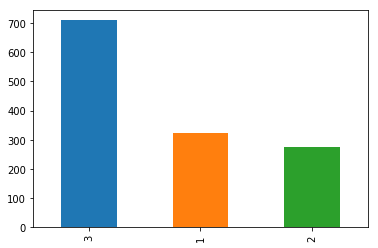

In [45]:
# most were in third class
# visualise these...
df.Pclass.value_counts().plot(kind='bar')

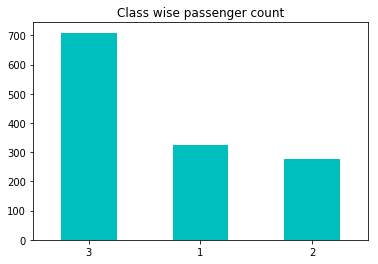

In [50]:
df.Pclass.value_counts().plot(kind='bar', rot=0, title='Class wise passenger count', color='c');
# rot makes the x axis titles straight, ; supresses the matplotlib header, c is cyan, title is obvious

### Distributions

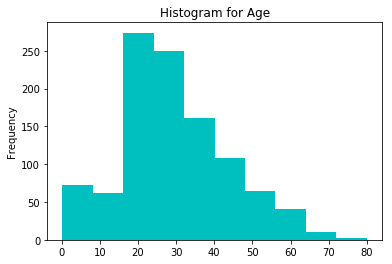

In [52]:
# let's create an age histogram
df.Age.plot(kind='hist', title='Histogram for Age', color='c');

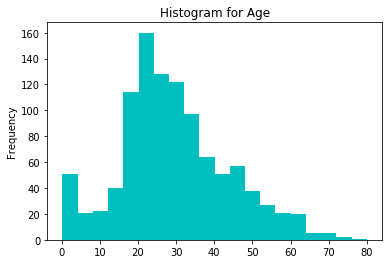

In [55]:
# In the above histogram, pandas has decided how many 'bins' to create.  But we can do that ourselves too
df.Age.plot(kind='hist', title='Histogram for Age', color='c', bins=20);

In [56]:
# Kind of normal (i.e one univariate spike) with a positive skew


In [57]:
# KDE plots

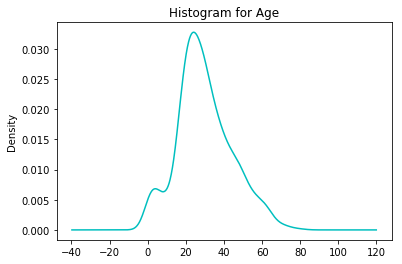

In [58]:
df.Age.plot(kind='kde', title='Histogram for Age', color='c');

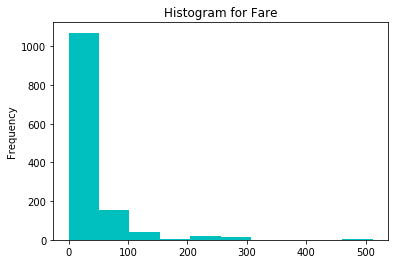

In [60]:
df.Fare.plot(kind='hist', title='Histogram for Fare', color='c');

In [61]:
# this is much more skewed than age
# let's compare the 'skewness'
print('skewness for age: {0:.2f}'.format(df.Age.skew()))
print('skewness for fare: {0:.2f}'.format(df.Fare.skew()))

skewness for age: 0.41
skewness for fare: 4.37


In [62]:
# fare skew is very high


### bivariate distribution

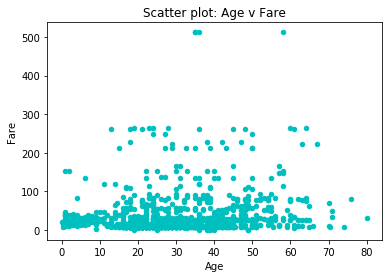

In [63]:
# create a scatter plot with pandas
# Did someone who was older pay more for their fare?
df.plot.scatter(x='Age', y='Fare', color='c', title='Scatter plot: Age v Fare');

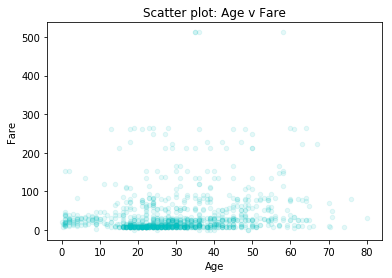

In [64]:
# that's a bit messy - let's put in alpha for transparency
df.plot.scatter(x='Age', y='Fare', color='c', title='Scatter plot: Age v Fare', alpha=0.1);

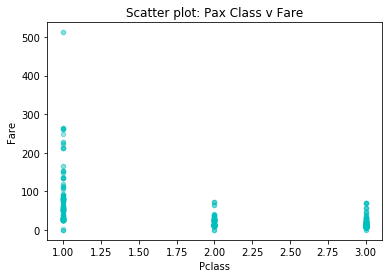

In [65]:
df.plot.scatter(x='Pclass', y='Fare', color='c', title='Scatter plot: Pax Class v Fare', alpha=0.15);

In [66]:
# this looks like there are three pax classes - 1, 2, 3
# We can see that there is a higher spread of 1st class prices.  But even then there are first class pax paying less that 2nd and 3rd
# The max fares for 2 and 3rd class are only up to $100

### Groupings and Aggregations

In [67]:
# group by, and get a median age from each group M/F  - so median age for m and f are similar
df.groupby('Sex').Age.median()

Sex
female    27.0
male      28.0
Name: Age, dtype: float64

In [69]:
# group by class
df.groupby(['Pclass']).Fare.median()

Pclass
1    60.0000
2    15.0458
3     8.0500
Name: Fare, dtype: float64

In [70]:
# so we can see that first class pax paid more on avg than the 2nd and 3rd class pax

In [71]:
# what was the median age, per class
df.groupby(['Pclass']).Age.median()

Pclass
1    39.0
2    29.0
3    24.0
Name: Age, dtype: float64

In [72]:
# median first class pax were older than the other classes

In [73]:
# we can apply median on multiple columns too
df.groupby(['Pclass'])['Fare','Age'].median()

,Fare,Age
Pclass,,
1,60.0000,39.0
2,15.0458,29.0
3,8.0500,24.0


In [75]:
# what is we want different types of summary stats at the same time?
# use agg function
df.groupby(['Pclass']).agg({'Fare':'mean','Age':'median'})

,Fare,Age
Pclass,,
1,87.508992,39.0
2,21.179196,29.0
3,13.302889,24.0


In [76]:
# let's create a nested direction, and do the aggregation over it
# more complicated aggregations 
aggregations = {
    'Fare': { # work on the "Fare" column
        'mean_Fare': 'mean',  # get the mean fare
        'median_Fare': 'median', # get median fare
        'max_Fare': max,
        'min_Fare': np.min
    },
    'Age': {     # work on the "Age" column
        'median_Age': 'median',   # Find the max, call the result "max_date"
        'min_Age': min,
        'max_Age': max,
        'range_Age': lambda x: max(x) - min(x)  # Calculate the age range per group
    }
}

In [77]:
df.groupby(['Pclass']).agg(aggregations)

/anaconda3/lib/python3.6/site-packages/pandas/core/groupby/groupby.py:4658: FutureWarning: using a dict with renaming is deprecated and will be removed in a future version
  return super(DataFrameGroupBy, self).aggregate(arg, *args, **kwargs)


Fare                                       Age                  \
        mean_Fare median_Fare  max_Fare min_Fare median_Age min_Age max_Age   
Pclass                                                                        
1       87.508992     60.0000  512.3292      0.0       39.0    0.92    80.0   
2       21.179196     15.0458   73.5000      0.0       29.0    0.67    70.0   
3       13.302889      8.0500   69.5500      0.0       24.0    0.17    74.0   

                  
       range_Age  
Pclass            
1          79.08  
2          69.33  
3          73.83

In [78]:
# This result was very quick to return

In [79]:
# Can we group based on more than one variable?
# Get the median fare depending on embarkagtion and the class
df.groupby(['Pclass', 'Embarked']).Fare.median()

Pclass  Embarked
1       C           76.7292
        Q           90.0000
        S           52.0000
2       C           15.3146
        Q           12.3500
        S           15.3750
3       C            7.8958
        Q            7.7500
        S            8.0500
Name: Fare, dtype: float64

### Cross Tabs

In [81]:
# let's create a cross tab on the pax and gender features
pd.crosstab(df.Sex, df.Pclass)

Pclass,1,2,3
Sex,,,
female,144,106,216
male,179,171,493


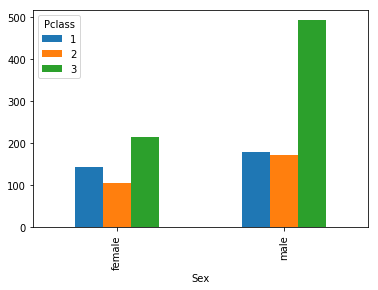

In [82]:
# 144 female 1st class, 179 male 1st class - most 3rd class pax are male...
pd.crosstab(df.Sex, df.Pclass).plot(kind='bar');

### Pivots

In [86]:
#let's find the mean/avg for male and female pax in each class
# we need to provide four bits of info
# 1 The row attribute we want to use - index sex
# 2 The column attribute - the class
# 3 The attribute we want to put in the cells - age
# 4 The aggregate function that we want to apply to the 3 attribute
df.pivot_table(index='Sex', columns='Pclass', values='Age',aggfunc='mean')

Pclass,1,2,3
Sex,,,
female,37.037594,27.499223,22.185329
male,41.029272,30.815380,25.962264


In [87]:
# as we can see that on avg, male pax age is higher than female pax age
# pivots are useful for working on numerical features for combinations of categorical features
# we could get the same info by using group-by
df.groupby(['Sex','Pclass']).Age.mean()

Sex     Pclass
female  1         37.037594
        2         27.499223
        3         22.185329
male    1         41.029272
        2         30.815380
        3         25.962264
Name: Age, dtype: float64

In [88]:
# similar results, but slightly harder to read
# let's get it tidy!
df.groupby(['Sex','Pclass']).Age.mean().unstack()

Pclass,1,2,3
Sex,,,
female,37.037594,27.499223,22.185329
male,41.029272,30.815380,25.962264


## Data Munging - are there missing values?

In [89]:
# use .info to detect any missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 11 columns):
Age         1046 non-null float64
Cabin       295 non-null object
Embarked    1307 non-null object
Fare        1308 non-null float64
Name        1309 non-null object
Parch       1309 non-null int64
Pclass      1309 non-null int64
Sex         1309 non-null object
SibSp       1309 non-null int64
Survived    1309 non-null int64
Ticket      1309 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 162.7+ KB


In [90]:
# e.g. from 1309 records, Embarked is missing 2 features, and age and cabin is missing in places too

# Fix the Feature: Embarked

In [93]:
# get only the isnull records into our data frame
df[df.Embarked.isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
PassengerId,,,,,,,,,,,
62,38.0,B28,NaN,80.0,"Icard, Miss. Amelie",0,1,female,0,1,113572
830,62.0,B28,NaN,80.0,"Stone, Mrs. George Nelson (Martha Evelyn)",0,1,female,0,1,113572


In [94]:
# So how can we will in the NaN embarked column here
# What is the most common embarkation point?
df.Embarked.value_counts()

S    914
C    270
Q    123
Name: Embarked, dtype: int64

In [95]:
# Most people got on at Southampton - we could use this to fill the missing value.
# We should also notice that these two records both Survived.  So we could consider which embarkation point had the 
# the most survivors.  It would be interesting to cross check this.
#
# Which embarkation point had the most survivors - nb -888 is our default when we didn't know if they Survived, so we 
# ignore those particular -888 records !=
pd.crosstab(df[df.Survived != -888].Survived, df[df.Survived != -888].Embarked)

Embarked,C,Q,S
Survived,,,
0,75,47,427
1,93,30,217


In [96]:
# Hmmm I'm not sure if this is helping. It's about 2:1 for didn't Survive.
# But yes, from the Survived row - S was the most probable
#
# So we can now replace the missing Embarked value with S 
# How do we do this? 
# Extract the observations with a missing Embarked feature, and assign this a value
#      df.loc[df.Embarked.isnull(), 'Embarked'] = 'S'
# Or we could just use Pandas fillna function which is for just this precise issues - inplace means the current df 
#      df.Embarked.fillna('S', inplace=True)
# will be updated.  If we had this false, pandas would create a new data frame
#
# For the purposes of this exercise we are NOT going to run these imputation fixes right now

In [97]:
# Option 2 - let's do some more investigation!
# Did the Fare class for each embarkation have an impact on the Survived feature?
# Because when we look at our extracted data in out[93] we can see that both observations were in Pclass = 1
# So does Fare (how much they paid for their ticket) have an impact on the survival probability? They paid $80
#
# Let's group all observations by Pclass and Embarkation point, and calculate the median fare - to try to avoid
# the impact of extreme values
df.groupby(['Pclass','Embarked']).Fare.median()

Pclass  Embarked
1       C           76.7292
        Q           90.0000
        S           52.0000
2       C           15.3146
        Q           12.3500
        S           15.3750
3       C            7.8958
        Q            7.7500
        S            8.0500
Name: Fare, dtype: float64

In [98]:
# This output shows for each Pclass and Embarked combination, we have the median fare
# So first class pax who boarded at Cherbourg is $76 - which is close to $80
# So it is possible that the two pax we don't have Embarked data for could infact have boarded at Cherbourg
# I'm not sure how we make that judgement instead of using Southampton - why do we give this option greater weight?
# Perhaps because we are using multiple features to help our investigation?
#
# Replace the missing value with C
df.Embarked.fillna('C', inplace=True)

In [99]:
# So now we should have no results if we look for null values
df[df.Embarked.isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
PassengerId,,,,,,,,,,,


In [100]:
# check info again
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 11 columns):
Age         1046 non-null float64
Cabin       295 non-null object
Embarked    1309 non-null object
Fare        1308 non-null float64
Name        1309 non-null object
Parch       1309 non-null int64
Pclass      1309 non-null int64
Sex         1309 non-null object
SibSp       1309 non-null int64
Survived    1309 non-null int64
Ticket      1309 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 162.7+ KB


In [101]:
# Ok - so now we have 1309 records for Embarked feature being non-null.  

## Fix a Feature: Fare, Age, Cabin
## Fare

In [102]:
# This only has one missing value, so should be easier to fix :D  Keep it simple
# Which rows have missing Fare
df[df.Fare.isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
PassengerId,,,,,,,,,,,
1044,60.5,NaN,S,NaN,"Storey, Mr. Thomas",0,3,male,0,-888,3701


In [105]:
# Pax class 3rd, boarded at Southampton
# We could use the median value for this data 
median_3rd_class_fare = df.loc[(df.Pclass == 3) & (df.Embarked =='S'),'Fare'].median()
print(median_3rd_class_fare)

8.05


In [107]:
# now replace the missing value with this median
df.Fare.fillna(median_3rd_class_fare, inplace=True)

In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 11 columns):
Age         1046 non-null float64
Cabin       295 non-null object
Embarked    1309 non-null object
Fare        1309 non-null float64
Name        1309 non-null object
Parch       1309 non-null int64
Pclass      1309 non-null int64
Sex         1309 non-null object
SibSp       1309 non-null int64
Survived    1309 non-null int64
Ticket      1309 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 162.7+ KB


In [109]:
# Great - all observations have a Fare feature value

## Feature: Age

In [112]:
# Lots of missing values here (263)
# so there's lots of records.  We can limit how many are returned from pandas
pd.options.display.max_rows = 15
# which rows have missing values?
df[df.Age.isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
PassengerId,,,,,,,,,,,
6,NaN,NaN,Q,8.4583,"Moran, Mr. James",0,3,male,0,0,330877
18,NaN,NaN,S,13.0000,"Williams, Mr. Charles Eugene",0,2,male,0,1,244373
20,NaN,NaN,C,7.2250,"Masselmani, Mrs. Fatima",0,3,female,0,1,2649
27,NaN,NaN,C,7.2250,"Emir, Mr. Farred Chehab",0,3,male,0,0,2631
29,NaN,NaN,Q,7.8792,"O'Dwyer, Miss. Ellen ""Nellie""",0,3,female,0,1,330959
30,NaN,NaN,S,7.8958,"Todoroff, Mr. Lalio",0,3,male,0,0,349216
32,NaN,B78,C,146.5208,"Spencer, Mrs. William Augustus (Marie Eugenie)",0,1,female,1,1,PC 17569
...,...,...,...,...,...,...,...,...,...,...,...
1274,NaN,NaN,S,14.5000,"Risien, Mrs. Samuel (Emma)",0,3,female,0,-888,364498


### Option 1: Replace all missing age with mean value - really basic

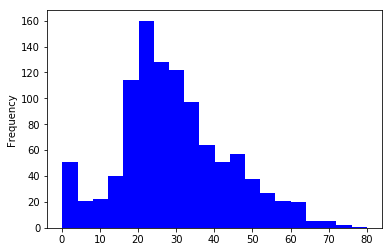

In [114]:
# let's explore this distribution of age before we go and replace data.  We don't want to be unduly
# affected by extremes
df.Age.plot(kind='hist', bins=20, color='b');

In [115]:
# so let's get the mean
df.Age.mean()

29.881137667304014

In [116]:
# we could replace all missing ages using fillna function
# But if we look the histogram though, we can see there are some extremes in the 70s/80s.  
# Mean can be unduly affected by extremes.  Perhaps there's a better option?


### Option 2: Replace with the median age of the gender

In [117]:
# Find the median for each gender
df.groupby('Sex').Age.median()

Sex
female    27.0
male      28.0
Name: Age, dtype: float64

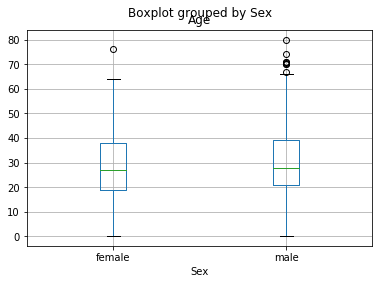

In [119]:
df[df.Age.notnull()].boxplot('Age', 'Sex'); # see the distribution of m and f pax and age
# We seem to be getting a similar age to what we found with the mean
# If we wanted to go with this, we could use this code:
#
# age_sex_median = df.groupby('Sex').Age.transform('median')
# df.Age.fillna(age_sex_median, inplace=True)
#
# We should keep digging through our data though - gender doesn't seem like a good choice, as both m and f 
# have similar distribtuions


## Option 3: Replace with the median age of Pclass

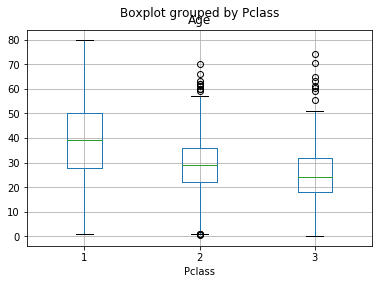

In [120]:
# Does the pax class have an impact on the median age?
df[df.Age.notnull()].boxplot('Age', 'Pclass');

In [ ]:
# In this we have a differing distribtuion of age, depending on Pclass
# I'm not sure how this is better or worse than just using age tho?  Does a wider distribution mean
# the data is more useful?
# It's not a bad choice I guess - but keep digging
#
# If we wanted to use this, run this code
# pclass_age_median = df.groupby('Pclass').Age.transform('median')
# print(pclass_age_median)
# df.Age.fillna(pclass_age_median, inplace=True)

## Option 3: replace with media age of Title
### There is some good info hidden in our data

In [122]:
# Typically, the title in the name can give a hint about the age of a person
# Master is a child, while Sir is for an older gentlemen
# This information should be common knowledge, but we could also imagine some of this information
# and knowledge would be in the head of subject matter experts - so sometimes we have to learn a lot about
# the subject at hand before we can be sure we are making the correct decision

In [123]:
df.Name # let's get a feel for the data


PassengerId
1                                 Braund, Mr. Owen Harris
2       Cumings, Mrs. John Bradley (Florence Briggs Th...
3                                  Heikkinen, Miss. Laina
4            Futrelle, Mrs. Jacques Heath (Lily May Peel)
5                                Allen, Mr. William Henry
6                                        Moran, Mr. James
7                                 McCarthy, Mr. Timothy J
                              ...                        
1303      Minahan, Mrs. William Edward (Lillian E Thorpe)
1304                       Henriksson, Miss. Jenny Lovisa
1305                                   Spector, Mr. Woolf
1306                         Oliva y Ocana, Dona. Fermina
1307                         Saether, Mr. Simon Sivertsen
1308                                  Ware, Mr. Frederick
1309                             Peter, Master. Michael J
Name: Name, Length: 1309, dtype: object

In [124]:
# There is a pattern:  family name, title, first name...  
# Write a function to extrac this
# We could use a regex but let's do it the long way
def GetTitle(name):
    first_name_with_title = name.split(',')[1]
    title = first_name_with_title.split('.')[0]
    title = title.strip().lower()
    return title

In [125]:
# Now use the map function to apply the function on each Name value in row
df.Name.map(lambda x: GetTitle(x)) #Lambda good for iterating.  Could also use df.Name.map(GetTitle)

PassengerId
1           mr
2          mrs
3         miss
4          mrs
5           mr
6           mr
7           mr
         ...  
1303       mrs
1304      miss
1305        mr
1306      dona
1307        mr
1308        mr
1309    master
Name: Name, Length: 1309, dtype: object

In [126]:
# Ok so what are the unique titles we are getting
df.Name.map(lambda x : GetTitle(x)).unique()

array(['mr', 'mrs', 'miss', 'master', 'don', 'rev', 'dr', 'mme', 'ms',
       'major', 'lady', 'sir', 'mlle', 'col', 'capt', 'the countess',
       'jonkheer', 'dona'], dtype=object)

In [127]:
#Ok so we have a bunch of similar titles, that we want to group together, so let's 
#use this restricted dictionary to better extract information
# Function to extract the title from the name  - e.g. Don, Rev and Sir are all considered 'Sir'
def GetTitle(name):
    title_group = {'mr' : 'Mr', 
               'mrs' : 'Mrs', 
               'miss' : 'Miss', 
               'master' : 'Master',
               'don' : 'Sir',
               'rev' : 'Sir',
               'dr' : 'Officer',
               'mme' : 'Mrs',
               'ms' : 'Mrs',
               'major' : 'Officer',
               'lady' : 'Lady',
               'sir' : 'Sir',
               'mlle' : 'Miss',
               'col' : 'Officer',
               'capt' : 'Officer',
               'the countess' : 'Lady',
               'jonkheer' : 'Sir',
               'dona' : 'Lady'
                 }
    first_name_with_title = name.split(',')[1]
    title = first_name_with_title.split('.')[0]
    title = title.strip().lower()
    return title_group[title]

# This new version of GetTitle

In [128]:
# So let's use this new function, and create a new feature Title in the dataframe
df['Title'] = df.Name.map(lambda x: GetTitle(x))

In [129]:
# Look at the data to see if it worked
df.head()

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket,Title
PassengerId,,,,,,,,,,,,
1,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,3,male,1,0,A/5 21171,Mr
2,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,female,1,1,PC 17599,Mrs
3,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,female,0,1,STON/O2. 3101282,Miss
4,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,female,1,1,113803,Mrs
5,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,3,male,0,0,373450,Mr


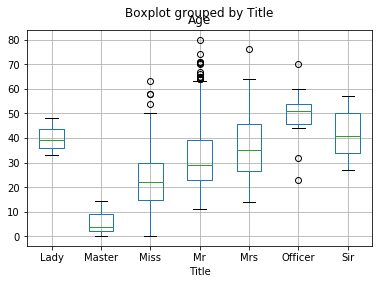

In [130]:
# Great - now we have title in our data frame
# Now boxplot title with age to get an idea of distribtuion
df[df.Age.notnull()].boxplot('Age','Title')

In [133]:
# Interesting! Median age for Master is low (as expected)
# Median age for Miss is also slightly lower than just for Mrs
# So perhaps Title is a good feature to use for replacing the missing age values
#
# Use the transform function to get the median age for observations grouped by Title
title_age_median = df.groupby('Title').Age.transform('median')
df.Age.fillna(title_age_median, inplace=True)

In [134]:
# Now check our data again
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 12 columns):
Age         1309 non-null float64
Cabin       295 non-null object
Embarked    1309 non-null object
Fare        1309 non-null float64
Name        1309 non-null object
Parch       1309 non-null int64
Pclass      1309 non-null int64
Sex         1309 non-null object
SibSp       1309 non-null int64
Survived    1309 non-null int64
Ticket      1309 non-null object
Title       1309 non-null object
dtypes: float64(2), int64(4), object(6)
memory usage: 172.9+ KB


In [ ]:
# Hmm since we have such little Cabin information, perhaps we shouldn't bother using it in our predictive models?
# We COULD likely fill in some of it based on family name, where some members of same family were likely in the same cabin?


## Working with Outliers


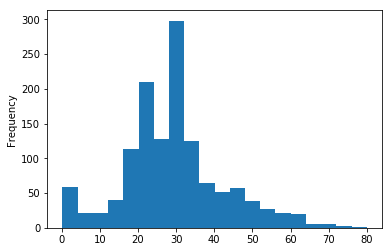

In [135]:
# use a histogram to get a view to start with
df.Age.plot(kind='hist', bins=20)

In [136]:
# while most ages are 20-30, there are a few in 70-80
# Let's look at rows where age > 70
df.loc[df.Age > 70] # use loc to LOCATE records matching the equation

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket,Title
PassengerId,,,,,,,,,,,,
97,71.0,A5,C,34.6542,"Goldschmidt, Mr. George B",0,1,male,0,0,PC 17754,Mr
117,70.5,NaN,Q,7.7500,"Connors, Mr. Patrick",0,3,male,0,0,370369,Mr
494,71.0,NaN,C,49.5042,"Artagaveytia, Mr. Ramon",0,1,male,0,0,PC 17609,Mr
631,80.0,A23,S,30.0000,"Barkworth, Mr. Algernon Henry Wilson",0,1,male,0,1,27042,Mr
852,74.0,NaN,S,7.7750,"Svensson, Mr. Johan",0,3,male,0,0,347060,Mr
988,76.0,C46,S,78.8500,"Cavendish, Mrs. Tyrell William (Julia Florence...",0,1,female,1,-888,19877,Mrs


In [137]:
# one male pax aged 80.  

### Fare Outliers

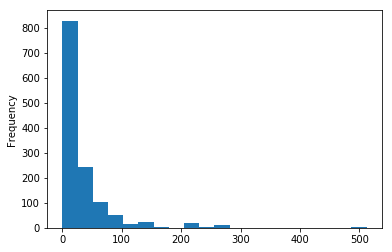

In [138]:
# use a histogram to get a view to start with
df.Fare.plot(kind='hist', bins=20)

In [139]:
# Wow a few pax payed 500!


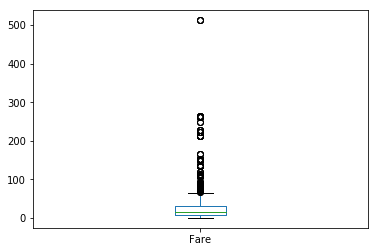

In [140]:
df.Fare.plot(kind='box')

In [141]:
# Wow that 500 is so far outside the boxplot  
# What is going on with this?


In [146]:
# Let's find pax with the max fare
df.loc[df.Fare == df.Fare.max()]

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket,Title
PassengerId,,,,,,,,,,,,
259,35.0,NaN,C,512.3292,"Ward, Miss. Anna",0,1,female,0,1,PC 17755,Miss
680,36.0,B51 B53 B55,C,512.3292,"Cardeza, Mr. Thomas Drake Martinez",1,1,male,0,1,PC 17755,Mr
738,35.0,B101,C,512.3292,"Lesurer, Mr. Gustave J",0,1,male,0,1,PC 17755,Mr
1235,58.0,B51 B53 B55,C,512.3292,"Cardeza, Mrs. James Warburton Martinez (Charlo...",1,1,female,0,-888,PC 17755,Mrs


In [147]:
# Notice how these 4 passengers all paid the maximum, and all have the same ticket number.
# They were all first class.  Maybe they booked at teh last moment and paid a high fare?
# Or maybe there was a mistake, and the fare paid is actual $512 for all four combined?
# Three of them Survived.  The Fourth, we don't know.  
# 
# What can we do with these values?  We don't want to remove them, they can have great insights.
# 
# But let's keep these records for the moment, but try to reduce the Skew on our data frame - this is a common approach

In [148]:
# In this example, we could apply Log to the outlier pax fares, to bring the Skew down a little
# NB we add 1 to the fare here, because SOME pax paid 0 fare, and log(0) is undefined and would break our code
LogFare = np.log(df.Fare + 1.0)

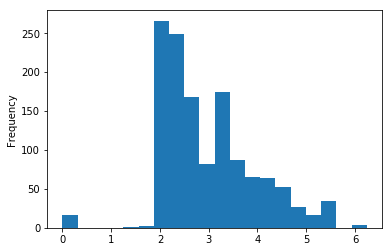

In [149]:
# Hist of the LogFare
LogFare.plot(kind='hist', bins=20)

In [150]:
# The result is a somewhat less skewed distribtion


In [151]:
# Binning is also good
# Pandas has qcut function for quantile based bining
# Split the fares into four bins, where each bin contains almost the same number of observations
pd.qcut(df.Fare, 4)

PassengerId
1         (-0.001, 7.896]
2       (31.275, 512.329]
3         (7.896, 14.454]
4       (31.275, 512.329]
5         (7.896, 14.454]
6         (7.896, 14.454]
7       (31.275, 512.329]
              ...        
1303    (31.275, 512.329]
1304      (-0.001, 7.896]
1305      (7.896, 14.454]
1306    (31.275, 512.329]
1307      (-0.001, 7.896]
1308      (7.896, 14.454]
1309     (14.454, 31.275]
Name: Fare, Length: 1309, dtype: category
Categories (4, interval[float64]): [(-0.001, 7.896] < (7.896, 14.454] < (14.454, 31.275] < (31.275, 512.329]]

In [152]:
# Pandas creates 4 Categories (bins) which contains particular ranges
# We can name bins too
pd.qcut(df.Fare, 4, labels=['very low','low','high','very high']) #known as discretization technique

PassengerId
1        very low
2       very high
3             low
4       very high
5             low
6             low
7       very high
          ...    
1303    very high
1304     very low
1305          low
1306    very high
1307     very low
1308          low
1309         high
Name: Fare, Length: 1309, dtype: category
Categories (4, object): [very low < low < high < very high]

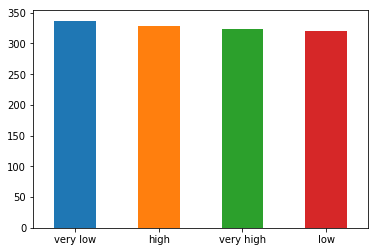

In [153]:
# We effectively transform a numerical feature into a categorical feature, to improve understanding
# We have a similar number of observations in each bin
# Now stick that on a plot
pd.qcut(df.Fare, 4, labels=['very low','low','high','very high']).value_counts().plot(kind='bar', rot=0)

In [154]:
# Now create the Fare bin feature
df['Fare_Bin'] = pd.qcut(df.Fare, 4, labels=['very low','low','high','very high'])

## Feature Engineering

### Feature: Age State - i.e. adult or child

In [157]:
# Let's have a look at some data
df['AgeState'] = np.where(df['Age'] >= 18, 'Adult', 'Child')

In [158]:
# Get a count of adult and child
df['AgeState'].value_counts()

Adult    1147
Child     162
Name: AgeState, dtype: int64

In [159]:
# Have a look at a cross tab to see who survives - were children more likely on the lifeboats?
pd.crosstab(df[df.Survived != -888].Survived, df[df.Survived != -888].AgeState)

AgeState,Adult,Child
Survived,,
0,495,54
1,279,63


In [160]:
# So most children survived, and most adults died - or at least that's waht it looks like for 
# the observations where we have survival feature data != -888


### Feature: Family Size

In [161]:
# let's collate siblings etc into the observation - combine parent size with sibling size
df['FamilySize'] = df.Parch + df.SibSp + 1 # Add 1 to include the 'self' of the pax observation record

In [163]:
# let's explore family a bit more - a small family might all get into the lifeboat.  
# But if it's a big family, maybe not everyone got in the lifeboat?

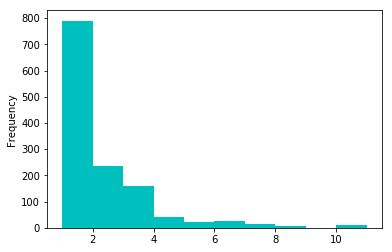

In [171]:
df.head()
df.FamilySize.plot(kind='hist', color='c');

In [172]:
# This histogram shows us that most of the individuals are either single, or from small families (2-4 persons)

In [174]:
# But there are extremes on the right - let's look at those, as there can be good info in extremes
# So let's look at observations for families with max family size
df.loc[df.FamilySize == df.FamilySize.max(), ['Name','Survived','FamilySize','Ticket']]

,Name,Survived,FamilySize,Ticket
PassengerId,,,,
160,"Sage, Master. Thomas Henry",0,11,CA. 2343
181,"Sage, Miss. Constance Gladys",0,11,CA. 2343
202,"Sage, Mr. Frederick",0,11,CA. 2343
325,"Sage, Mr. George John Jr",0,11,CA. 2343
793,"Sage, Miss. Stella Anna",0,11,CA. 2343
847,"Sage, Mr. Douglas Bullen",0,11,CA. 2343
864,"Sage, Miss. Dorothy Edith ""Dolly""",0,11,CA. 2343
1080,"Sage, Miss. Ada",-888,11,CA. 2343
1234,"Sage, Mr. John George",-888,11,CA. 2343


In [175]:
# Here we see all the 11 family members, all on the same ticket, and most of them we know DID NOT survive
# So it's possible the rest of the four in the test data set might also NOT have probably survived

In [176]:
# Let's use a crosstab to see if there is any correlation between FamilySize and Survived rate
pd.crosstab(df[df.Survived != -888].FamilySize, df[df.Survived != -888].Survived)

Survived,0,1
FamilySize,,
1,374,163
2,72,89
3,43,59
4,8,21
5,12,3
6,19,3
7,8,4
8,6,0
11,7,0


In [177]:
# So small families of 2-3-4, more passengers survived than did not survive.  Perhaps if one family member got into the lifeboat
# then all would get in
# But for large families, most family members did not survive

### Feature: IsMother

In [178]:
# Did mothers with babies get priority on the lifeboats?

In [179]:
# Who is a mother?
# Probably female, > 18, has Parch > 0 and is marries (i.e. not Miss)
# Again, this would need some domain expertise to be able to determine if this is a useful feature
df['IsMother'] = np.where(((df.Sex == 'female') & (df.Parch > 0) & (df.Age > 18) & (df.Title != 'Miss')), 1,0)

In [180]:
#Now let's cross table IsMother with survival
pd.crosstab(df[df.Survived != -888].Survived, df[df.Survived != -888].IsMother)

IsMother,0,1
Survived,,
0,533,16
1,303,39


In [181]:
# So 39 mothers survived, and 16 did not make it

## Deck feature

In [182]:
# We want to determine if the deck that the pax cabin was in has an impact
# Can also give idea of the socioeconomic class of the pax


In [183]:
# Cabin attribute hopefully gives us info
df.Cabin

PassengerId
1        NaN
2        C85
3        NaN
4       C123
5        NaN
6        NaN
7        E46
        ... 
1303     C78
1304     NaN
1305     NaN
1306    C105
1307     NaN
1308     NaN
1309     NaN
Name: Cabin, Length: 1309, dtype: object

In [184]:
# Maybe the Letter is the Deck and the Number is the CabinNo.
# Or it might be that Nan means pax were not assigned a unique cabin
# Let's see all the unique cabin info
df.Cabin.unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [185]:
# Scanning this info, we can see we have NaN and LetterNumbers - but also a 'T' - what is this?

In [186]:
df.loc[df.Cabin == 'T']

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket,Title,Fare_Bin,AgeState,FamilySize,IsMother
PassengerId,,,,,,,,,,,,,,,,
340,45.0,T,S,35.5,"Blackwell, Mr. Stephen Weart",0,1,male,0,0,113784,Mr,very high,Adult,1,0


In [187]:
# It's not likely we will want to create an entirely separate deck just for one pax, so let's just make it NaN and 
# assume it's a mistake
df.loc[df.Cabin == 'T','Cabin'] = np.NaN

In [188]:
df.Cabin.unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44', 'A34',
       'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14', 'B37',
       'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38', 'B39',
       'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68', 'B41',
       'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48', 'E58',
       'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64', 'E24

In [190]:
# Now T is gone.  
# Let's create Decks for the cabins, and the NaN cabins put into deck Z
def get_deck(cabin):
    return np.where(pd.notnull(cabin), str(cabin)[0].upper(),'Z')
df['Deck'] = df['Cabin'].map(lambda x: get_deck(x))

In [191]:
# check deck counts
df.Deck.value_counts()

Z    1015
C      94
B      65
D      46
E      41
A      22
F      21
G       5
Name: Deck, dtype: int64

In [192]:
# let's see if Deck has an impact on Survived
pd.crosstab(df[df.Survived != -888].Survived, df[df.Survived != -888].Deck)

Deck,A,B,C,D,E,F,G,Z
Survived,,,,,,,,
0,8,12,24,8,8,5,2,482
1,7,35,35,25,24,8,2,206


In [193]:
# So most pax in B,C,D,E most survived
# Deck seems a good indicator for survial
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 17 columns):
Age           1309 non-null float64
Cabin         294 non-null object
Embarked      1309 non-null object
Fare          1309 non-null float64
Name          1309 non-null object
Parch         1309 non-null int64
Pclass        1309 non-null int64
Sex           1309 non-null object
SibSp         1309 non-null int64
Survived      1309 non-null int64
Ticket        1309 non-null object
Title         1309 non-null object
Fare_Bin      1309 non-null category
AgeState      1309 non-null object
FamilySize    1309 non-null int64
IsMother      1309 non-null int64
Deck          1309 non-null object
dtypes: category(1), float64(2), int64(6), object(8)
memory usage: 215.3+ KB


In [194]:
# We now have 17 features 

In [195]:
# object / category features are good for understanding but not great for machine learning algorithms.
# most algos can only work on numerics
#
# So let's encode categorical features!

## Categorical Feature Encoding

In [196]:
# LEt's tidy up the binary features - this is the simple first approach
df['IsMale'] = np.where(df.Sex == 'male', 1, 0)

In [197]:
# Let's use get_dummies function to Convert categorical variable into dummy/indicator variables
# NB that AgeState is a categorical feature Adult/Child - but get_dummies doesn't mind if you pass such a feature
# if it only has two classes
# We will be overwriting the contents of df
df = pd.get_dummies(df, columns=['Deck','Pclass','Title','Fare_Bin','Embarked','AgeState'])

In [198]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 39 columns):
Age                   1309 non-null float64
Cabin                 294 non-null object
Fare                  1309 non-null float64
Name                  1309 non-null object
Parch                 1309 non-null int64
Sex                   1309 non-null object
SibSp                 1309 non-null int64
Survived              1309 non-null int64
Ticket                1309 non-null object
FamilySize            1309 non-null int64
IsMother              1309 non-null int64
IsMale                1309 non-null int64
Deck_A                1309 non-null uint8
Deck_B                1309 non-null uint8
Deck_C                1309 non-null uint8
Deck_D                1309 non-null uint8
Deck_E                1309 non-null uint8
Deck_F                1309 non-null uint8
Deck_G                1309 non-null uint8
Deck_Z                1309 non-null uint8
Pclass_1              1309 non-null uint8
Pcla

In [199]:
# Wow so now we have 39 columns of data!  We've transformed categorical data into one-hot binary features
# So awesome

In [200]:
# But we still have the cabin feature and Name which are still object, as is Ticket
# We can drop these object features, and we can also drop columns we used to create family size feature
# We just generally want to reduce noise.  The same for Sex - created Is_Male from this already
# Drop the redundant columns and reorder the data frame


## Drop and Reorder Columns


In [201]:
# axis = 1 i.e. drop columns, inplace of the current df
df.drop(['Cabin','Name','Parch','SibSp','Sex'], axis=1, inplace = True)

In [202]:
# reorder 
columns = [column for column in df.columns if column != 'Survived'] #create columns list WITHOUT SURVIVED
columns = ['Survived'] + columns # Now put Survived at teh front of the columns list
df = df[columns] #now assign the data frame with these reordered columns

In [203]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 34 columns):
Survived              1309 non-null int64
Age                   1309 non-null float64
Fare                  1309 non-null float64
Ticket                1309 non-null object
FamilySize            1309 non-null int64
IsMother              1309 non-null int64
IsMale                1309 non-null int64
Deck_A                1309 non-null uint8
Deck_B                1309 non-null uint8
Deck_C                1309 non-null uint8
Deck_D                1309 non-null uint8
Deck_E                1309 non-null uint8
Deck_F                1309 non-null uint8
Deck_G                1309 non-null uint8
Deck_Z                1309 non-null uint8
Pclass_1              1309 non-null uint8
Pclass_2              1309 non-null uint8
Pclass_3              1309 non-null uint8
Title_Lady            1309 non-null uint8
Title_Master          1309 non-null uint8
Title_Miss            1309 non-null uint8
Title_

In [204]:
# Now Survived is at the top of the list, and only int or float numerical columns :D


## Save the Processed Dataset

In [205]:
processed_data_path = os.path.join(os.path.pardir,'data','processed') #store data in data/processed folder
write_train_path = os.path.join(processed_data_path,'train.csv')
write_test_path = os.path.join(processed_data_path,'test.csv')

In [206]:
# now write the data frame to the file
# Test data is that data with Survived = -888
# So let's ignore those, to get just the Train data set
df.loc[df.Survived != -888].to_csv(write_train_path) #pandas built in function

In [207]:
# write the test data
columns = [column for column in df.columns if column != 'Survived'] #test data shouldn't have the survived columns
df.loc[df.Survived == -888, columns].to_csv(write_test_path)

In [208]:
!ls -al


total 896
drwxr-xr-x   6 graemerenfrew  staff     192 26 Jul 12:51 .
drwxr-xr-x  20 graemerenfrew  staff     640 25 Jul 11:47 ..
-rw-r--r--   1 graemerenfrew  staff       0 24 Jul 11:57 .gitkeep
drwxr-xr-x   4 graemerenfrew  staff     128 25 Jul 13:09 .ipynb_checkpoints
-rw-r--r--   1 graemerenfrew  staff   12126 25 Jul 12:51 1.0-ak-extract-titanic-data.ipynb
-rw-r--r--   1 graemerenfrew  staff  442400 26 Jul 12:51 2.0-ak-exploring-processing-data.ipynb


In [211]:
!ls -al ../data/processed

total 224
drwxr-xr-x  5 graemerenfrew  staff    160 26 Jul 12:52 .
drwxr-xr-x  7 graemerenfrew  staff    224 25 Jul 12:38 ..
-rw-r--r--  1 graemerenfrew  staff      0 24 Jul 11:57 .gitkeep
-rw-r--r--  1 graemerenfrew  staff  35357 26 Jul 12:52 test.csv
-rw-r--r--  1 graemerenfrew  staff  75808 26 Jul 12:51 train.csv


In [212]:
# cool our data is stored

## Build the data processing script to do all this for us


In [213]:
# We want a reproduceable script that can do all our logic in one place, so we can run all the above!
# This is good practice and means we can just run our script from the command prompt

In [214]:
# create a script that we can run any time
get_processed_data_script_file = os.path.join(os.path.pardir,'src','data','get_processed_data.py')

In [215]:
%%writefile $get_processed_data_script_file
import numpy as np
import pandas as pd
import os

def read_data():
    # set the path of the raw data
    raw_data_path = os.path.join(os.path.pardir,'data','raw')
    train_file_path = os.path.join(raw_data_path, 'train.csv')
    test_file_path = os.path.join(raw_data_path, 'test.csv')
    # read the data with all default parameters
    train_df = pd.read_csv(train_file_path, index_col='PassengerId')
    test_df = pd.read_csv(test_file_path, index_col='PassengerId')
    #We don't have the Survived field in Test, so let's fill it with a default so we can
    #concat test and train together 
    test_df['Survived'] = -888
    df = pd.concat((train_df, test_df), axis=0)
    return df

def process_data(df):
    # using the method chaining concept - this is different from the code we wrote in ecah cell
    # we can chain methods, and the next function uses the output of the previous
    return (df
         # create title attribute - then add this 
         .assign(Title = lambda x: x.Name.map(get_title))
         # working missing values - start with this
         .pipe(fill_missing_values) #This lets us apply a function into the data frame
         
         # create fare bin feature
         .assign(Fare_Bin = lambda x: pd.qcut(x.Fare, 4, labels=['very_low','low','high','very_high']))
         # create age state
         .assign(AgeState = lambda x : np.where(x.Age >= 18, 'Adult','Child'))
         .assign(FamilySize = lambda x : x.Parch + x.SibSp + 1)
         .assign(IsMother = lambda x : np.where(((x.Sex == 'female') & (x.Parch > 0) & (x.Age > 18) & (x.Title != 'Miss')), 1, 0))
          # create deck feature
         .assign(Cabin = lambda x: np.where(x.Cabin == 'T', np.nan, x.Cabin)) 
         .assign(Deck = lambda x : x.Cabin.map(get_deck))
         # feature encoding 
         .assign(IsMale = lambda x : np.where(x.Sex == 'male', 1,0))
            
         .pipe(pd.get_dummies, columns=['Deck', 'Pclass','Title', 'Fare_Bin', 'Embarked','AgeState'])
         # add code to drop unnecessary columns
         .drop(['Cabin','Name','Ticket','Parch','SibSp','Sex'], axis=1) #no need for inplace option here, since we are using chaining
         # reorder columns
         .pipe(reorder_columns)
         )

def get_title(name):
    title_group = {'mr' : 'Mr', 
               'mrs' : 'Mrs', 
               'miss' : 'Miss', 
               'master' : 'Master',
               'don' : 'Sir',
               'rev' : 'Sir',
               'dr' : 'Officer',
               'mme' : 'Mrs',
               'ms' : 'Mrs',
               'major' : 'Officer',
               'lady' : 'Lady',
               'sir' : 'Sir',
               'mlle' : 'Miss',
               'col' : 'Officer',
               'capt' : 'Officer',
               'the countess' : 'Lady',
               'jonkheer' : 'Sir',
               'dona' : 'Lady'
                 }
    first_name_with_title = name.split(',')[1]
    title = first_name_with_title.split('.')[0]
    title = title.strip().lower()
    return title_group[title]

def get_deck(cabin):
    return np.where(pd.notnull(cabin),str(cabin)[0].upper(),'Z')

def fill_missing_values(df):
    # embarked
    df.Embarked.fillna('C', inplace=True)
    # fare
    median_fare = df[(df.Pclass == 3) & (df.Embarked == 'S')]['Fare'].median()
    df.Fare.fillna(median_fare, inplace=True)
    # age
    title_age_median = df.groupby('Title').Age.transform('median')
    df.Age.fillna(title_age_median , inplace=True)
    return df

def reorder_columns(df):
    columns = [column for column in df.columns if column != 'Survived']
    columns = ['Survived'] + columns
    df = df[columns]
    return df 

    
def write_data(df):
    processed_data_path = os.path.join(os.path.pardir,'data','processed')
    write_train_path = os.path.join(processed_data_path, 'train.csv')
    write_test_path = os.path.join(processed_data_path, 'test.csv')
    # train data
    df[df.Survived != -888].to_csv(write_train_path) 
    # test data
    columns = [column for column in df.columns if column != 'Survived']
    df[df.Survived == -888][columns].to_csv(write_test_path) 

if __name__ == '__main__':
    df = read_data()
    df = process_data(df)
    write_data(df)

Writing ../src/data/get_processed_data.py


In [216]:
!python3 $get_processed_data_script_file

../src/data/get_processed_data.py:16: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  df = pd.concat((train_df, test_df), axis=0)


In [217]:
train_df = pd.read_csv(write_train_path)
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 34 columns):
PassengerId           891 non-null int64
Survived              891 non-null int64
Age                   891 non-null float64
Fare                  891 non-null float64
FamilySize            891 non-null int64
IsMother              891 non-null int64
IsMale                891 non-null int64
Deck_A                891 non-null int64
Deck_B                891 non-null int64
Deck_C                891 non-null int64
Deck_D                891 non-null int64
Deck_E                891 non-null int64
Deck_F                891 non-null int64
Deck_G                891 non-null int64
Deck_Z                891 non-null int64
Pclass_1              891 non-null int64
Pclass_2              891 non-null int64
Pclass_3              891 non-null int64
Title_Lady            891 non-null int64
Title_Master          891 non-null int64
Title_Miss            891 non-null int64
Title_Mr              891 non-

In [218]:
test_df = pd.read_csv(write_test_path)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 33 columns):
PassengerId           418 non-null int64
Age                   418 non-null float64
Fare                  418 non-null float64
FamilySize            418 non-null int64
IsMother              418 non-null int64
IsMale                418 non-null int64
Deck_A                418 non-null int64
Deck_B                418 non-null int64
Deck_C                418 non-null int64
Deck_D                418 non-null int64
Deck_E                418 non-null int64
Deck_F                418 non-null int64
Deck_G                418 non-null int64
Deck_Z                418 non-null int64
Pclass_1              418 non-null int64
Pclass_2              418 non-null int64
Pclass_3              418 non-null int64
Title_Lady            418 non-null int64
Title_Master          418 non-null int64
Title_Miss            418 non-null int64
Title_Mr              418 non-null int64
Title_Mrs             418 non-

In [219]:
#Whoop! 